In [1]:
# Load all the important Libraries and Print TF Version
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from tensorflow import lite
tf.__version__

'2.12.0'

In [2]:
# Connect G Drive
from google.colab import drive
drive.mount('/content/drive/')

# Setup Path where all data and models will be saved
path ='/content/drive/MyDrive/SVC_model/'

Mounted at /content/drive/


# Data Pre-Processing

### Sitting Data - Pre-Processing

In [3]:
# Creating a list of all the common column names for all the data files
col_names =["Time","AccelX","AccelY","AccelZ","GyroX","GyroY","GyroZ"]

# Read the Sitting Unprocessed Data in dedicated dataframes
df_sitting = pd.read_csv(path + 'Sitting.csv', header=None, names=col_names)

# Remove the time column from the dataset
df_sitting.drop([df_sitting.columns[0]],axis=1,inplace=True)

# Delete the following from the data: 'AccelX:', 'AccelY:', 'AccelZ:', 'GyroX:', 'GyroY:', 'GyroZ:'
df_sitting = df_sitting.replace(['AccelX:', 'AccelY:', 'AccelZ:', 'GyroX:', 'GyroY:', 'GyroZ:' ], '', regex=True)
df_sitting

,AccelX,AccelY,AccelZ,GyroX,GyroY,GyroZ
0,0.09,9.73,-1.42,-0.35,0.06,-0.03
1,-0.00,9.65,-1.70,-0.38,0.05,-0.02
2,0.15,9.64,-2.14,-0.50,0.08,-0.02
3,0.13,9.23,-2.19,-0.48,0.13,-0.03
4,-0.08,10.06,-2.44,-0.52,0.12,-0.03
...,...,...,...,...,...,...
3911,0.96,9.90,-1.08,-0.43,0.07,-0.02
3912,0.89,9.92,-1.15,-0.44,0.07,-0.04
3913,1.05,9.74,-1.49,-0.50,-0.03,-0.01
3914,0.95,10.01,-1.58,-0.52,0.06,-0.01


In [4]:
# Check the data type
df_sitting.dtypes

AccelX    object
AccelY    object
AccelZ    object
GyroX     object
GyroY     object
GyroZ     object
dtype: object

In [5]:
# Convert to Float
df_sitting = df_sitting.astype('float')
# Check data type again
df_sitting.dtypes

AccelX    float64
AccelY    float64
AccelZ    float64
GyroX     float64
GyroY     float64
GyroZ     float64
dtype: object

In [6]:
# Add an Activity Column in the df_sitting dataframe to show that the activity is "Sitting"
df_sitting['Activity'] = 'Sitting'
df_sitting


,AccelX,AccelY,AccelZ,GyroX,GyroY,GyroZ,Activity
0,0.09,9.73,-1.42,-0.35,0.06,-0.03,Sitting
1,-0.00,9.65,-1.70,-0.38,0.05,-0.02,Sitting
2,0.15,9.64,-2.14,-0.50,0.08,-0.02,Sitting
3,0.13,9.23,-2.19,-0.48,0.13,-0.03,Sitting
4,-0.08,10.06,-2.44,-0.52,0.12,-0.03,Sitting
...,...,...,...,...,...,...,...
3911,0.96,9.90,-1.08,-0.43,0.07,-0.02,Sitting
3912,0.89,9.92,-1.15,-0.44,0.07,-0.04,Sitting
3913,1.05,9.74,-1.49,-0.50,-0.03,-0.01,Sitting
3914,0.95,10.01,-1.58,-0.52,0.06,-0.01,Sitting


In [7]:
# Make Sure Activity only contains Sitting
df_sitting.Activity.unique()

array(['Sitting'], dtype=object)

In [8]:
# Save the data into a CSV File without the index
df_sitting.to_csv(path + 'Sitting-Data-Pre-Processed.csv', index=False)

### Standing Data - Pre-Processing

In [9]:
# Read the Standing Unprocessed Data in dedicated dataframes
df_standing = pd.read_csv(path + 'Standing.csv', header=None, names=col_names)

# Remove the time column from the dataset
df_standing.drop([df_standing.columns[0]],axis=1,inplace=True)

# Delete the following from the data: 'AccelX:', 'AccelY:', 'AccelZ:', 'GyroX:', 'GyroY:', 'GyroZ:'
df_standing = df_standing.replace(['AccelX:', 'AccelY:', 'AccelZ:', 'GyroX:', 'GyroY:', 'GyroZ:' ], '', regex=True)
df_standing

,AccelX,AccelY,AccelZ,GyroX,GyroY,GyroZ
0,-0.84,9.83,2.59,0.82,-0.12,0.08
1,0.23,9.08,-3.38,-0.75,-0.18,-0.00
2,-0.51,9.51,-1.83,-0.70,0.52,-0.41
3,-0.57,9.99,-1.64,-0.67,0.32,-0.23
4,-0.78,9.79,-1.68,-0.55,-0.29,0.08
...,...,...,...,...,...,...
3005,-0.17,9.56,-2.58,-0.37,0.05,-0.03
3006,-0.20,9.48,-2.60,-0.31,0.08,-0.03
3007,-0.12,9.64,-2.96,-0.30,0.11,-0.06
3008,-0.08,9.23,-3.19,-0.28,0.12,-0.05


In [10]:
# Check the data type
df_standing.dtypes

AccelX    object
AccelY    object
AccelZ    object
GyroX     object
GyroY     object
GyroZ     object
dtype: object

In [11]:
# Convert to Float
df_standing = df_standing.astype('float')
# Check data type again
df_standing.dtypes

AccelX    float64
AccelY    float64
AccelZ    float64
GyroX     float64
GyroY     float64
GyroZ     float64
dtype: object

In [12]:
# Add an Activity Column in the df_standing dataframe to show that the activity is "Standing"
df_standing['Activity'] = 'Standing'
df_standing


,AccelX,AccelY,AccelZ,GyroX,GyroY,GyroZ,Activity
0,-0.84,9.83,2.59,0.82,-0.12,0.08,Standing
1,0.23,9.08,-3.38,-0.75,-0.18,-0.00,Standing
2,-0.51,9.51,-1.83,-0.70,0.52,-0.41,Standing
3,-0.57,9.99,-1.64,-0.67,0.32,-0.23,Standing
4,-0.78,9.79,-1.68,-0.55,-0.29,0.08,Standing
...,...,...,...,...,...,...,...
3005,-0.17,9.56,-2.58,-0.37,0.05,-0.03,Standing
3006,-0.20,9.48,-2.60,-0.31,0.08,-0.03,Standing
3007,-0.12,9.64,-2.96,-0.30,0.11,-0.06,Standing
3008,-0.08,9.23,-3.19,-0.28,0.12,-0.05,Standing


In [13]:
# Make Sure Activity only contains Standing
df_standing.Activity.unique()

array(['Standing'], dtype=object)

In [14]:
# Save the data into a CSV File without the index
df_standing.to_csv(path + 'Standing-Data-Pre-Processed.csv', index=False)

### Walking Data - Pre-Processing

In [15]:
# Read the Walking Unprocessed Data in dedicated dataframes
df_walking = pd.read_csv(path + 'Walking.csv', header=None, names=col_names)

# Remove the time column from the dataset
df_walking.drop([df_walking.columns[0]],axis=1,inplace=True)

# Delete the following from the data: 'AccelX:', 'AccelY:', 'AccelZ:', 'GyroX:', 'GyroY:', 'GyroZ:'
df_walking = df_walking.replace(['AccelX:', 'AccelY:', 'AccelZ:', 'GyroX:', 'GyroY:', 'GyroZ:' ], '', regex=True)
df_walking

,AccelX,AccelY,AccelZ,GyroX,GyroY,GyroZ
0,-1.86,7.23,8.86,-0.26,0.33,0.15
1,-0.63,6.01,10.24,0.34,-0.05,0.21
2,0.11,8.71,-3.11,-1.03,0.23,0.19
3,-0.25,9.65,-3.55,-0.78,-0.10,0.39
4,-0.13,9.91,-4.15,-0.73,0.11,0.49
...,...,...,...,...,...,...
7975,2.62,9.27,-0.19,-0.46,-0.24,0.10
7976,2.24,10.68,0.06,-0.83,-0.54,-0.14
7977,1.42,10.12,-0.56,-0.27,-0.92,0.10
7978,1.52,11.49,-1.83,-0.41,0.25,0.00


In [16]:
# Check the data type
df_walking.dtypes

AccelX    object
AccelY    object
AccelZ    object
GyroX     object
GyroY     object
GyroZ     object
dtype: object

In [17]:
# Convert to Float
df_walking = df_walking.astype('float')
# Check data type again
df_walking.dtypes

AccelX    float64
AccelY    float64
AccelZ    float64
GyroX     float64
GyroY     float64
GyroZ     float64
dtype: object

In [18]:
# Add an Activity Column in the df_walking dataframe to show that the activity is "Walking"
df_walking['Activity'] = 'Walking'
df_walking


,AccelX,AccelY,AccelZ,GyroX,GyroY,GyroZ,Activity
0,-1.86,7.23,8.86,-0.26,0.33,0.15,Walking
1,-0.63,6.01,10.24,0.34,-0.05,0.21,Walking
2,0.11,8.71,-3.11,-1.03,0.23,0.19,Walking
3,-0.25,9.65,-3.55,-0.78,-0.10,0.39,Walking
4,-0.13,9.91,-4.15,-0.73,0.11,0.49,Walking
...,...,...,...,...,...,...,...
7975,2.62,9.27,-0.19,-0.46,-0.24,0.10,Walking
7976,2.24,10.68,0.06,-0.83,-0.54,-0.14,Walking
7977,1.42,10.12,-0.56,-0.27,-0.92,0.10,Walking
7978,1.52,11.49,-1.83,-0.41,0.25,0.00,Walking


In [19]:
# Make Sure Activity only contains Walking
df_walking.Activity.unique()

array(['Walking'], dtype=object)

In [20]:
# Save the data into a CSV File without the index
df_walking.to_csv(path + 'Walking-Data-Pre-Processed.csv', index=False)

### Concatenate the data into a single dataframe

In [21]:
# First read all the datasets again
df_sitting = pd.read_csv(path + 'Sitting-Data-Pre-Processed.csv')
df_standing = pd.read_csv(path + 'Standing-Data-Pre-Processed.csv')
df_walking = pd.read_csv(path + 'Walking-Data-Pre-Processed.csv')


In [22]:
# Find out what dataset has the lowest number of rows/data
min_rows = len(df_sitting)
min_df = df_sitting
min_df.name = 'df_sitting'

if len(df_standing) < min_rows:
    min_rows = len(df_standing)
    min_df = df_standing
    min_df.name = 'df_standing'

if len(df_walking) < min_rows:
    min_rows = len(df_walking)
    min_df = df_walking
    min_df.name = 'df_walking'

print("The DataFrame with the lowest number of rows is: %s" % min_df.name)
print("The Minimum Number of Rows are:", min_rows)
print(min_df)

The DataFrame with the lowest number of rows is: df_standing
The Minimum Number of Rows are: 3010
      AccelX  AccelY  AccelZ  GyroX  GyroY  GyroZ  Activity
0      -0.84    9.83    2.59   0.82  -0.12   0.08  Standing
1       0.23    9.08   -3.38  -0.75  -0.18  -0.00  Standing
2      -0.51    9.51   -1.83  -0.70   0.52  -0.41  Standing
3      -0.57    9.99   -1.64  -0.67   0.32  -0.23  Standing
4      -0.78    9.79   -1.68  -0.55  -0.29   0.08  Standing
...      ...     ...     ...    ...    ...    ...       ...
3005   -0.17    9.56   -2.58  -0.37   0.05  -0.03  Standing
3006   -0.20    9.48   -2.60  -0.31   0.08  -0.03  Standing
3007   -0.12    9.64   -2.96  -0.30   0.11  -0.06  Standing
3008   -0.08    9.23   -3.19  -0.28   0.12  -0.05  Standing
3009   -0.21    9.24   -3.52  -0.33   0.11  -0.04  Standing

[3010 rows x 7 columns]


In [23]:
# Ensure all the data is the same size, so only read the minimum number of rows determined above. Make sure sitting data is only read for 3010 rows
df_sitting = df_sitting.head(min_rows)
df_sitting

,AccelX,AccelY,AccelZ,GyroX,GyroY,GyroZ,Activity
0,0.09,9.73,-1.42,-0.35,0.06,-0.03,Sitting
1,-0.00,9.65,-1.70,-0.38,0.05,-0.02,Sitting
2,0.15,9.64,-2.14,-0.50,0.08,-0.02,Sitting
3,0.13,9.23,-2.19,-0.48,0.13,-0.03,Sitting
4,-0.08,10.06,-2.44,-0.52,0.12,-0.03,Sitting
...,...,...,...,...,...,...,...
3005,-0.14,9.33,-2.32,-0.45,0.11,0.01,Sitting
3006,-0.30,9.27,-2.19,-0.47,0.15,0.03,Sitting
3007,-0.47,9.88,-1.39,-0.68,-0.08,-0.20,Sitting
3008,-0.87,9.98,-1.33,-0.62,-0.04,-0.22,Sitting


In [24]:
# Ensure all the data is the same size, so only read the minimum number of rows determined above. Make sure sitting data is only read for 3010 rows
df_walking = df_walking.head(min_rows)
df_walking

,AccelX,AccelY,AccelZ,GyroX,GyroY,GyroZ,Activity
0,-1.86,7.23,8.86,-0.26,0.33,0.15,Walking
1,-0.63,6.01,10.24,0.34,-0.05,0.21,Walking
2,0.11,8.71,-3.11,-1.03,0.23,0.19,Walking
3,-0.25,9.65,-3.55,-0.78,-0.10,0.39,Walking
4,-0.13,9.91,-4.15,-0.73,0.11,0.49,Walking
...,...,...,...,...,...,...,...
3005,1.06,8.87,-0.77,-0.49,-0.33,0.06,Walking
3006,1.48,11.78,-0.61,-0.81,0.05,-0.16,Walking
3007,1.15,8.56,-1.48,-0.50,0.35,-0.13,Walking
3008,1.85,9.11,-1.36,-0.65,0.30,-0.04,Walking


In [25]:
train_df = pd.concat([df_sitting, df_standing, df_walking], axis = 0)
train_df

,AccelX,AccelY,AccelZ,GyroX,GyroY,GyroZ,Activity
0,0.09,9.73,-1.42,-0.35,0.06,-0.03,Sitting
1,-0.00,9.65,-1.70,-0.38,0.05,-0.02,Sitting
2,0.15,9.64,-2.14,-0.50,0.08,-0.02,Sitting
3,0.13,9.23,-2.19,-0.48,0.13,-0.03,Sitting
4,-0.08,10.06,-2.44,-0.52,0.12,-0.03,Sitting
...,...,...,...,...,...,...,...
3005,1.06,8.87,-0.77,-0.49,-0.33,0.06,Walking
3006,1.48,11.78,-0.61,-0.81,0.05,-0.16,Walking
3007,1.15,8.56,-1.48,-0.50,0.35,-0.13,Walking
3008,1.85,9.11,-1.36,-0.65,0.30,-0.04,Walking


In [26]:
# Save the data into a CSV File without the index
train_df.to_csv(path + 'Combined-Data-Pre-Processed.csv', index=False)
train_df = pd.read_csv(path + 'Combined-Data-Pre-Processed.csv', header=0)

In [27]:
# Check Column Names and Check Data Types
column_name = train_df.columns
print(column_name)
train_df.dtypes

Index(['AccelX', 'AccelY', 'AccelZ', 'GyroX', 'GyroY', 'GyroZ', 'Activity'], dtype='object')


AccelX      float64
AccelY      float64
AccelZ      float64
GyroX       float64
GyroY       float64
GyroZ       float64
Activity     object
dtype: object

In [28]:
# Check for Unique Labels for Activity Column
train_df.Activity.unique()

array(['Sitting', 'Standing', 'Walking'], dtype=object)

In [29]:
# Make sure the data for all the activites is equivalent
count_sitting = train_df.Activity.value_counts()['Sitting']
print("Sitting Values: ", count_sitting)

count_standing = train_df.Activity.value_counts()['Standing']
print("Standing Values: ", count_standing)

count_walking = train_df.Activity.value_counts()['Walking']
print("Walking Values: ", count_walking)


Sitting Values:  3010
Standing Values:  3010
Walking Values:  3010


## Split the Data and Class Labels

In [30]:
#  Data Labels
X_train = train_df[train_df.columns[:6]]

# Class Labels
y_train = train_df[train_df.columns[6:7]]

In [31]:
# Verify Data Split
X_train

,AccelX,AccelY,AccelZ,GyroX,GyroY,GyroZ
0,0.09,9.73,-1.42,-0.35,0.06,-0.03
1,-0.00,9.65,-1.70,-0.38,0.05,-0.02
2,0.15,9.64,-2.14,-0.50,0.08,-0.02
3,0.13,9.23,-2.19,-0.48,0.13,-0.03
4,-0.08,10.06,-2.44,-0.52,0.12,-0.03
...,...,...,...,...,...,...
9025,1.06,8.87,-0.77,-0.49,-0.33,0.06
9026,1.48,11.78,-0.61,-0.81,0.05,-0.16
9027,1.15,8.56,-1.48,-0.50,0.35,-0.13
9028,1.85,9.11,-1.36,-0.65,0.30,-0.04


In [32]:
# Verify Class Label Split
y_train

,Activity
0,Sitting
1,Sitting
2,Sitting
3,Sitting
4,Sitting
...,...
9025,Walking
9026,Walking
9027,Walking
9028,Walking


In [33]:
# Ensure Class Labels are Split Correctly and Conatin Unique Values
y_train.Activity.unique()

array(['Sitting', 'Standing', 'Walking'], dtype=object)

In [34]:
# Make sure the data for all the activites is equivalent
count_sitting = train_df.Activity.value_counts()['Sitting']
print("Sitting Values: ", count_sitting)

count_standing = train_df.Activity.value_counts()['Standing']
print("Standing Values: ", count_standing)

count_walking = train_df.Activity.value_counts()['Walking']
print("Walking Values: ", count_walking)

Sitting Values:  3010
Standing Values:  3010
Walking Values:  3010


## Assign Numbers to Class Labels
### 0 for Sitting
### 1 for Standing
### 2 for Walking

In [35]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)

# Sitting dataset has first value at 2, last value at 3010, Standing values start from
#y_train[:1]
#y_train[:3916]
#y_train[:3919]
#y_train[:6926]
y_train[:6927]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 2, 2, 2])

In [36]:
# y_train converted to Numpy Array, check that it still contains unique values
unique_vals = np.unique(y_train)
print(unique_vals)


[0 1 2]


# Train Model

In [37]:
# Loading train and Test split from sklearn lib
from sklearn.model_selection import train_test_split

In [38]:
# Copy Dataframe
X = X_train.copy()
Y = y_train.copy()
# Spliting the data into 30% testing data and 70% training dataset 
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=42)

In [39]:
# Loading all the lib
from sklearn.pipeline import make_pipeline #To creating a machine learning pipeline
from sklearn.preprocessing import StandardScaler  # loading Standard Scaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier # loading 2 liner pre trained model
# 1 LogisticRegression
# 2 RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #Loading next 2 classifer pre trained model
# 3 RandomForestClassifier
# 4 GradientBoostingClassifier
from sklearn.svm import SVC

In [40]:
# Creating the pipeline 
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=100000)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    'svc':make_pipeline(StandardScaler(), SVC())
}

In [41]:
# Fit the data in the pipeline to train the model
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(x_train, y_train)
    fit_models[algo] = model

In [42]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=100000))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())]),
 'svc': Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])}

In [43]:
# Testing the RidgeClassifier model
fit_models['rc'].predict(x_test)

array([0, 2, 1, ..., 2, 1, 1])

In [44]:
from sklearn.metrics import accuracy_score # to check accuracy score 
import pickle #to save the model

In [57]:
# Checking the accuracy of each model
print("Accuracy of the models ")
for algo, model in fit_models.items():
    yhat = model.predict(x_test)
    print(algo, accuracy_score(y_test, yhat))

Accuracy of the models 
lr 0.7021040974529347
rc 0.6980435585086748
rf 0.8615725359911407
gb 0.8534514581026209
svc 0.8600959763750461


In [46]:
# Saving the svc model using pickel 
with open('model_svc.pkl', 'wb') as f:
    pickle.dump(fit_models['svc'], f)

[[763 124  34]
 [ 61 786  51]
 [ 65  44 781]]


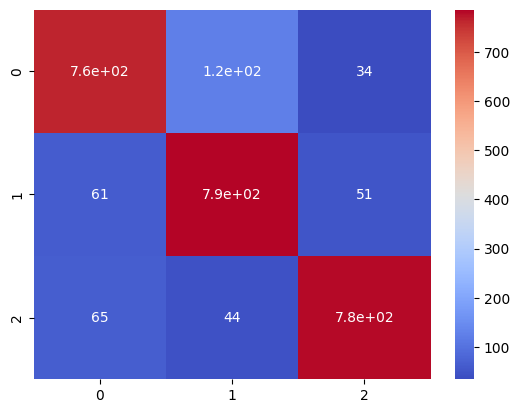

In [47]:
# Creating confusion matrix 
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test, yhat)
print(con)
sns.heatmap(con, cmap = 'coolwarm', annot = True)
plt.show()

## Test the Model
### 10 Packet Data Window

In [48]:
import pickle

In [49]:
# Loading the save model using pickel 
with open('model_svc.pkl', 'rb') as f:
    load_model = pickle.load(f)

In [50]:
col_names =["Time:","AccelX:","AccelY:","AccelZ:","GyroX:","GyroY:","GyroZ:"]

In [51]:
df = pd.read_csv('/content/drive/MyDrive/SVC_model/Walking.csv')

# Data Preprocessing
count = 0
for col in df.columns:
   for index in df.index:
      value = str(df.loc[index,col])
      value = value.replace(col_names[count],'')
      value = float(value)
      df.loc[index,col] = value
   count += 1

In [52]:
df

,Time:59560,AccelX:-1.86,AccelY:7.23,AccelZ:8.86,GyroX:-0.26,GyroY:0.33,GyroZ:0.15
0,59655.0,-0.63,6.01,10.24,0.34,-0.05,0.21
1,60778.0,0.11,8.71,-3.11,-1.03,0.23,0.19
2,60889.0,-0.25,9.65,-3.55,-0.78,-0.1,0.39
3,60913.0,-0.13,9.91,-4.15,-0.73,0.11,0.49
4,60960.0,1.14,9.38,-3.07,-0.75,0.27,0.38
...,...,...,...,...,...,...,...
7974,1642649.0,2.62,9.27,-0.19,-0.46,-0.24,0.1
7975,1642787.0,2.24,10.68,0.06,-0.83,-0.54,-0.14
7976,1642861.0,1.42,10.12,-0.56,-0.27,-0.92,0.1
7977,1643162.0,1.52,11.49,-1.83,-0.41,0.25,0.0


In [53]:
# Renaming the column names 
df.rename(columns={df.columns[0]:col_names[0][:-1],
                   df.columns[1]:col_names[1][:-1],
                   df.columns[2]:col_names[2][:-1],
                   df.columns[3]:col_names[3][:-1],
                   df.columns[4]:col_names[4][:-1],
                   df.columns[5]:col_names[5][:-1],
                   df.columns[6]:col_names[6][:-1]},inplace=True)
df.head(10)

,Time,AccelX,AccelY,AccelZ,GyroX,GyroY,GyroZ
0,59655.0,-0.63,6.01,10.24,0.34,-0.05,0.21
1,60778.0,0.11,8.71,-3.11,-1.03,0.23,0.19
2,60889.0,-0.25,9.65,-3.55,-0.78,-0.1,0.39
3,60913.0,-0.13,9.91,-4.15,-0.73,0.11,0.49
4,60960.0,1.14,9.38,-3.07,-0.75,0.27,0.38
5,61089.0,0.0,9.36,-4.69,-0.64,0.29,0.2
6,61135.0,0.6,9.0,-2.25,-0.7,0.17,0.3
7,61250.0,0.52,9.5,-4.13,-0.66,-0.71,-0.09
8,61353.0,-0.65,9.53,-3.2,-0.59,-0.27,-0.27
9,61422.0,-1.22,9.33,-1.71,-0.61,-0.19,-0.09


In [54]:
i = 0
while i <= 10:
  for j in df.index:
    t = -(df.loc[i,'Time'] - df.loc[j,'Time'])/1000
    if t>=10:
      avg_data = pd.DataFrame([df.iloc[i:j].mean()[1:]])
      Result = load_model.predict(avg_data)
      if Result == 0:
        print(f"Prediction of row {i}-{j} of {round(t,1)}sec time-interval is : Sitting")
      elif Result == 1:
        print(f"Prediction of row {i}-{j} of {round(t,1)}sec time-interval is : Standing") 
      elif Result == 2:
        print(f"Prediction of row {i}-{j} of {round(t,1)}sec time-interval is : Walking")    
      break
  i += 1

Prediction of row 0-38 of 10.1sec time-interval is : Sitting
Prediction of row 1-45 of 10.0sec time-interval is : Sitting
Prediction of row 2-46 of 10.1sec time-interval is : Sitting
Prediction of row 3-46 of 10.0sec time-interval is : Sitting
Prediction of row 4-47 of 10.5sec time-interval is : Sitting
Prediction of row 5-47 of 10.4sec time-interval is : Sitting
Prediction of row 6-47 of 10.3sec time-interval is : Sitting
Prediction of row 7-47 of 10.2sec time-interval is : Sitting
Prediction of row 8-47 of 10.1sec time-interval is : Sitting
Prediction of row 9-47 of 10.1sec time-interval is : Sitting
Prediction of row 10-48 of 10.0sec time-interval is : Sitting


In [55]:
i = 0
for i in range(10):
  data = pd.DataFrame([df.iloc[i][1:]])
  print(data)
  Result = load_model.predict(data)
  if Result == 0:
    print(f"Prediction of row {i} is : Sitting")
  elif Result == 1:
    print(f"Prediction of row {i} is : Standing") 
  elif Result == 2:
    print(f"Prediction of row {i} is : Walking")    
  print(i)

   AccelX  AccelY  AccelZ  GyroX  GyroY  GyroZ
0   -0.63    6.01   10.24   0.34  -0.05   0.21
Prediction of row 0 is : Walking
0
   AccelX  AccelY  AccelZ  GyroX  GyroY  GyroZ
1    0.11    8.71   -3.11  -1.03   0.23   0.19
Prediction of row 1 is : Walking
1
   AccelX  AccelY  AccelZ  GyroX  GyroY  GyroZ
2   -0.25    9.65   -3.55  -0.78   -0.1   0.39
Prediction of row 2 is : Standing
2
   AccelX  AccelY  AccelZ  GyroX  GyroY  GyroZ
3   -0.13    9.91   -4.15  -0.73   0.11   0.49
Prediction of row 3 is : Walking
3
   AccelX  AccelY  AccelZ  GyroX  GyroY  GyroZ
4    1.14    9.38   -3.07  -0.75   0.27   0.38
Prediction of row 4 is : Walking
4
   AccelX  AccelY  AccelZ  GyroX  GyroY  GyroZ
5     0.0    9.36   -4.69  -0.64   0.29    0.2
Prediction of row 5 is : Sitting
5
   AccelX  AccelY  AccelZ  GyroX  GyroY  GyroZ
6     0.6     9.0   -2.25   -0.7   0.17    0.3
Prediction of row 6 is : Walking
6
   AccelX  AccelY  AccelZ  GyroX  GyroY  GyroZ
7    0.52     9.5   -4.13  -0.66  -0.71  -0.09
Pr

# Convert to TF Lite Model

In [56]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import tensorflow as tf

# Load the pipeline object using pickle
with open('model_svc.pkl', 'rb') as f:
    pipeline = pickle.load(f)

# Extract the SVC model from the pipeline
# Extract the SVC model from the pipeline using the named_steps attribute.
svc_model = pipeline.named_steps['svc']

# Convert the SVC model to a Keras model
input_shape = svc_model.support_vectors_.shape[1]
model_input = tf.keras.Input(shape=(input_shape,))
model_output = tf.keras.layers.Dense(1, activation='sigmoid')(model_input)
keras_model = tf.keras.Model(model_input, model_output)

# Convert the Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()

# Save the converted model to disk
with open(path + 'model_svc.tflite', 'wb') as f:
    f.write(tflite_model)
